In [1]:
from tensorflow.keras.datasets import imdb
max_features = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

C:\Users\Sang\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Sang\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
from tensorflow.keras.preprocessing import sequence
max_len = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [3]:
x_train.shape

(25000, 500)

In [4]:
y_test.shape

(25000,)

In [5]:
y_train.shape

(25000,)

In [6]:
y_test[:10]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [7]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [8]:
y_test_one_hot.shape

(25000, 2)

In [9]:
y_test_one_hot[0]

array([1., 0.], dtype=float32)

In [10]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [11]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.LSTM(32))
# # of parameters = 8320 = (32*32+32*32+32)+4
model.add(layers.Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 2)                 66        
Total params: 328,386
Trainable params: 328,386
Non-trainable params: 0
_________________________________________________________________


In [12]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [13]:
history = model.fit(x_train, y_train_one_hot, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 5s 30ms/step - loss: 0.4725 - acc: 0.7738 - val_loss: 0.3497 - val_acc: 0.8598: 3s - loss: 0.6910 -  - ETA: 2s - loss: 0 - ETA: 1s - loss: 0.5490 - acc: - ETA: 1s - loss: 0.5227 - acc:  - ETA: 0s - loss: 0.4997 - acc: 0.75 - ETA: 0s - loss: 0.4948 -
Epoch 2/10
157/157 [==============================] - 4s 28ms/step - loss: 0.2930 - acc: 0.8841 - val_loss: 0.2859 - val_acc: 0.8898lo - ETA: 0s - loss: 0.2995 - acc: - ETA: 0s - loss: 0.2950 - a
Epoch 3/10
157/157 [==============================] - 4s 28ms/step - loss: 0.2290 - acc: 0.9128 - val_loss: 0.2933 - val_acc: 0.87522s - loss: 0.2336 - a - ETA: 1s - loss: 0.23 - ETA: 0s - loss: 0.2233 - acc: - ETA: 0s - loss: 0.2269 - acc
Epoch 4/10
157/157 [==============================] - 4s 28ms/step - loss: 0.1966 - acc: 0.9272 - val_loss: 0.3194 - val_acc: 0.8682: 3s - loss: 0.1781 - ac - ETA: 2s - loss: 0.1850 - acc: 0.9 - ETA: 2s - loss: 0.1810 - acc:  - ET - ETA: 0s - loss: 0.1970 - ac

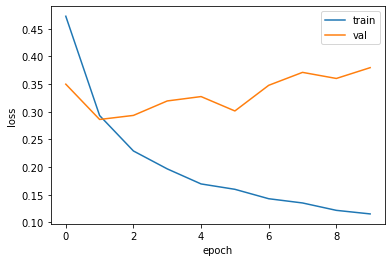

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [9]:
test_loss, test_acc = model.evaluate(x_test,y_test_one_hot)

25000/25000 [==============================] - 50s 2ms/step


In [10]:
print('test_acc:', test_acc)

test_acc: 0.86464
